# SYDSAP example

This notebook illustrates how to use SYDSAP on an example target pixel file.

In [1]:
import lightkurve as lk
from sydsap.sydsap import sydsap_tpf

Our target for this example is HR 6106. For comparison, we will start by downloading the SPOC light curve.

In [2]:
target = 'HR 6106'

lc_search = lk.search_lightcurve(target)
lc_search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,TESS-SPOC,1800,392326236,0.0
1,TESS Sector 12,2019,QLP,1800,392326236,0.0
2,TESS Sector 39,2021,SPOC,120,392326236,0.0
3,TESS Sector 39,2021,SPOC,120,392326240,0.0


In [3]:
spoc_lc = lc_search[2].download()

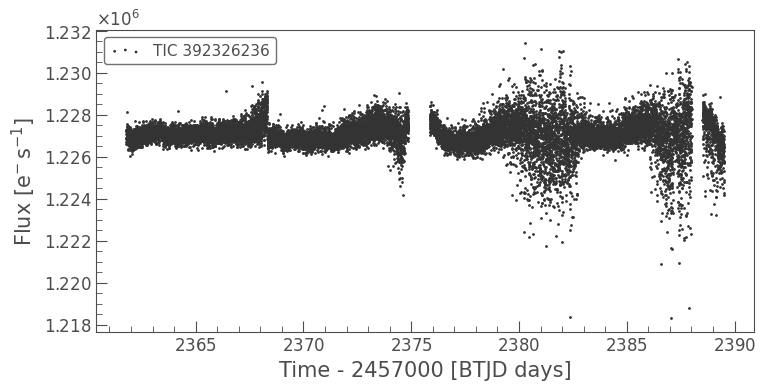

In [4]:
spoc_lc.scatter();

The quality of this light curve is poor at several times during Sector 39, and we will seek to improve this with SYDSAP. To do so, we must download the target pixel file.

In [5]:
tpf_search = lk.search_targetpixelfile(target)
tpf_search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,TESS-SPOC,1800,392326236,0.0
1,TESS Sector 39,2021,SPOC,120,392326236,0.0
2,TESS Sector 39,2021,SPOC,120,392326240,0.0


In [6]:
tpf = tpf_search[1].download()

To run SYDSAP, we must first change the class of the target pixel file to be a "SYDSAP" target pixel file.

In [7]:
tpf.__class__ = sydsap_tpf

Then we run `sydsap()` on the tpf...

In [8]:
lc = tpf.sydsap()

... et voilà

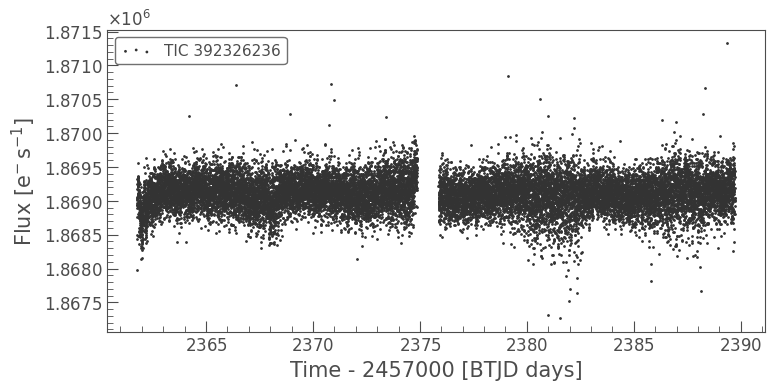

In [9]:
lc.scatter();

Some systematics still exist in the light curve, but it is a significant improvement on the original.

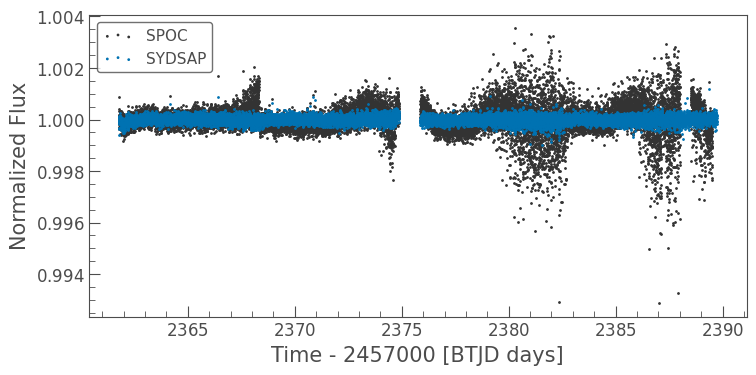

In [10]:
ax = spoc_lc.normalize().scatter(label='SPOC')
lc.normalize().scatter(ax=ax,label='SYDSAP');